In [1]:
# Run the notebook as if it's in the PROJECT directory
%bookmark PROJ_ROOT /reg/data/ana03/scratch/cwang31/pf
%cd -b PROJ_ROOT

(bookmark:PROJ_ROOT) -> /reg/data/ana03/scratch/cwang31/pf
/reg/data/ana03/scratch/cwang31/pf


In [2]:
# Load paths for using psana
%env SIT_ROOT=/reg/g/psdm/
%env SIT_DATA=/cds/group/psdm/data/
%env SIT_PSDM_DATA=/cds/data/psdm/

env: SIT_ROOT=/reg/g/psdm/
env: SIT_DATA=/cds/group/psdm/data/
env: SIT_PSDM_DATA=/cds/data/psdm/


In [3]:
import matplotlib.pyplot     as plt
import matplotlib.colors     as mcolors
import matplotlib.patches    as mpatches
import matplotlib.transforms as mtransforms
%matplotlib inline

In [28]:
import os
import numpy as np
import random

from peaknet.datasets.lite  import SFXDataset
from peaknet.utils          import split_dataset

In [8]:
# Set up parameters for an experiment...
drc_dataset   = 'datasets'
## fl_dataset    = 'sfx.0003.npy'
fl_dataset    = 'sfx.0000.raw.npy'    # Raw, just give it a try
path_dataset  = os.path.join(drc_dataset, fl_dataset)

frac_train    = 0.7
frac_validate = 0.5
dataset_usage = 'train'

seed       = 0

# [[[ DATASET ]]]
# Load raw data...
dataset_list = np.load(path_dataset)
data_train   , data_val_and_test = split_dataset(dataset_list     , frac_train   , seed = seed)
data_validate, data_test         = split_dataset(data_val_and_test, frac_validate, seed = seed)

# Define the training set
dataset_train = SFXDataset( dataset_list = data_train,
                            seed         = seed, )

# Define validation set...
dataset_validate = SFXDataset( dataset_list = data_validate,
                               seed         = seed, )


In [85]:
len(dataset_train), len(dataset_validate), len(data_test)

(187, 40, 41)

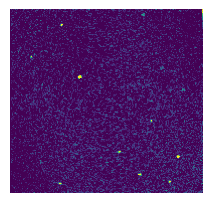

In [16]:
idx = 2
img, label = dataset_train[idx]
img_viz = img[0]

fig = plt.figure(figsize = (1.929,1.929))
vmin = img_viz.mean()
vmax = img_viz.mean() + 4 * img_viz.std()
plt.imshow(img_viz, vmin = vmin, vmax = vmax)

plt.xticks([])
plt.yticks([])
# plt.colorbar()
plt.gca().spines['top'   ].set_visible(False)
plt.gca().spines['right' ].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'  ].set_visible(False)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
plt.set_cmap('viridis')

In [86]:
img, label = dataset_train[idx]
img.shape

(1, 185, 194)

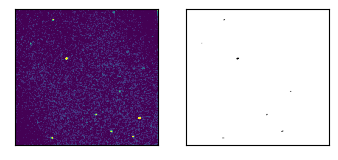

In [27]:
idx = 2
img, label = dataset_train[idx]

w, h = 1.929,1.929

ncols = 2
nrows = 1

w *= ncols + 0.1
h *= nrows

fig   = plt.figure(figsize = (w, h))
gspec = fig.add_gridspec( nrows, ncols,
                          #width_ratios  = [1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/20],
                          #height_ratios = [1/2, 1/2],
                        )
ax_list = [ fig.add_subplot(gspec[j, i]) for i in range(ncols) for j in range(nrows)]

# Plot the input image...
ax = ax_list[0]
vmin = img.mean()
vmax = img.mean() + 4 * img.std()
ax.imshow(img[0], vmin = vmin, vmax = vmax, cmap = 'viridis')

# Plot the label...
ax = ax_list[1]
ax.imshow(label[0], vmin = 0, vmax = 1, cmap = 'Greys')

# Applly style...
for ax in ax_list:
    ax.set_xticks([])
    ax.set_yticks([])

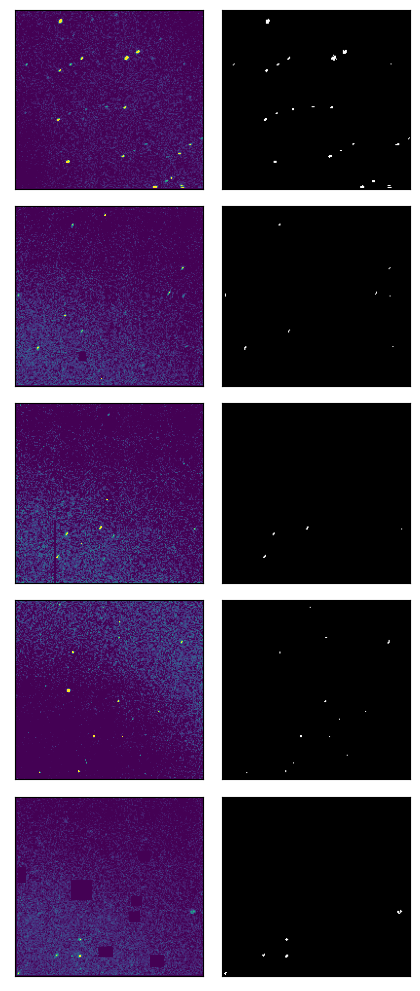

In [84]:
saves_plot = True

# random.seed(1)
# num_samples = 5
# idx_list = random.sample(range(len(dataset_train)), k = num_samples)
idx_list = [124, 107, 130, 145, 65]

w, h = 1.929,1.929

ncols = 2
nrows = len(idx_list)

w *= ncols + 0.05
h *= nrows + 0.1

fig   = plt.figure(figsize = (w, h))
gspec = fig.add_gridspec( nrows, ncols,
                          #width_ratios  = [1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/20],
                          #height_ratios = [1/2, 1/2],
                        )
ax_list = [ [ fig.add_subplot(gspec[j, i]) for i in range(ncols) ] for j in range(nrows)]

for enum_idx, idx in enumerate(idx_list):
    img, label = dataset_train[idx]

    # Plot the input image...
    ax = ax_list[enum_idx][0]
    vmin = img.mean()
    vmax = img.mean() + 4 * img.std()
    ax.imshow(img[0], vmin = vmin, vmax = vmax, cmap = 'viridis')
    # ax.set_title(idx)

    # Plot the label...
    ax = ax_list[enum_idx][1]
    ax.imshow(label[0], vmin = 0, vmax = 1, cmap = 'Greys_r', alpha = 1.0)

    # Applly style...
    for ax in ax_list[enum_idx]:
        ax.set_xticks([])
        ax.set_yticks([])

if saves_plot:
    drc_pdf  = "figures.paper"
    fl_pdf   = "data_labeling.pdf"
    path_pdf = os.path.join(drc_pdf, fl_pdf)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
    fig.savefig(path_pdf, dpi = 300)